In [275]:
import pandas as pd
import numpy as np
import folium

from sklearn.preprocessing import normalize
from sklearn.base import ClusterMixin
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud

np.random.seed(777)

In [245]:
data = pd.read_csv('data/bbc-news-data.csv', sep='\t')
data.sample(5)

category filename                              title  \
50         business  051.txt  Fiat mulls Ferrari market listing   
1566          sport  254.txt    Anelka apologises for criticism   
743   entertainment  234.txt   Elvis regains top chart position   
863   entertainment  354.txt    Stars shine on Bafta red carpet   
773   entertainment  264.txt   Grammys honour soul star Charles   

                                                content  
50     Ferrari could be listed on the stock market a...  
1566   Manchester City striker Nicolas Anelka has is...  
743    Elvis Presley has scored his 19th number one ...  
863    Hollywood stars brought a touch of glamour to...  
773    The memory of soul legend Ray Charles dominat...

In [246]:
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
stop_words = set(stopwords.words('english') + ['ha', 'wa', 'say', 'said'])
lemmatizer = WordNetLemmatizer()

In [247]:
def preprocess(text):
    text = list(filter(str.isalpha, word_tokenize(text.lower())))
    text = list(lemmatizer.lemmatize(word) for word in text)
    text = list(word for word in text if word not in stop_words)
    return ' '.join(text)

In [248]:
data['raw_text'] = data.apply(lambda row: row.title + row.content, axis=1)
data['text'] = data.apply(lambda row: preprocess(row.raw_text), axis=1)
data.sample(3)

category filename                              title  \
1498    sport  186.txt  Stuart joins Norwich from Addicks   
1315    sport  003.txt  Greene sets sights on world title   
2157     tech  334.txt  Security warning over 'FBI virus'   

                                                content  \
1498   Norwich have signed Charlton midfielder Graha...   
1315   Maurice Greene aims to wipe out the pain of l...   
2157   The US Federal Bureau of Investigation is war...   

                                               raw_text  \
1498  Stuart joins Norwich from Addicks Norwich have...   
1315  Greene sets sights on world title Maurice Gree...   
2157  Security warning over 'FBI virus' The US Feder...   

                                                   text  
1498  stuart join norwich addicks norwich signed cha...  
1315  greene set sight world title maurice greene ai...  
2157  security warning virus u federal bureau invest...

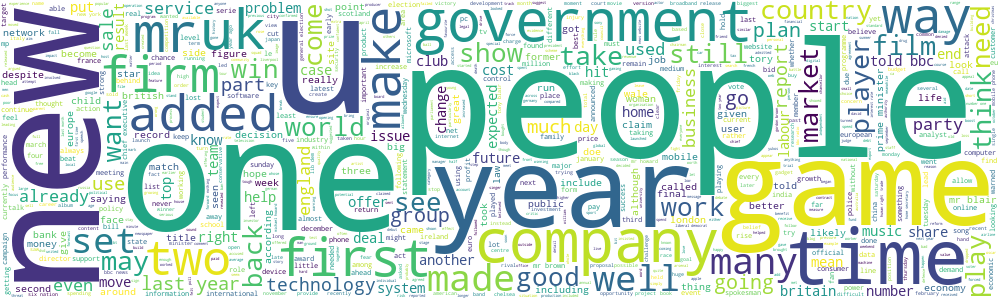

In [249]:
def draw_wordcloud(texts, max_words=1000, width=1000, height=300):
    wordcloud = WordCloud(background_color='white', max_words=max_words,
                          width=width, height=height)
    joint_texts = ' '.join(list(texts))
    wordcloud.generate(joint_texts)
    return wordcloud.to_image()
draw_wordcloud(data.text)

In [274]:
tf_idf_vectorizer = TfidfVectorizer()
tf_idf_data = tf_idf_vectorizer.fit_transform(data['text'])

# filtering data
tf_idf_sum = np.array(tf_idf_data.sum(axis=0)).ravel()
tf_idf_mask = np.argwhere(tf_idf_sum > tf_idf_sum.mean()).ravel()
tf_idf_data_filtered = tf_idf_data[:, tf_idf_mask]
tf_idf_data = tf_idf_data_filtered

In [251]:
n_clusters = 5
kmeans_estimator = KMeans(n_clusters=n_clusters)
kmeans_res = kmeans_estimator.fit_predict(tf_idf_data)

In [252]:
for i in range(n_clusters):
    centre = np.argmax(kmeans_estimator.cluster_centers_[i])
    tf_idf_dict = tf_idf_vectorizer.vocabulary_
    print(list(tf_idf_dict.keys())[list(tf_idf_dict.values()).index(centre)])

# kmeans_estimator.cluster_centers_[0][np.argmax(kmeans_estimator.)]
# tf_idf_vectorizer.inverse_transform(kmeans_estimator.cluster_centers_[0].max())

game
mr
mobile
film
mr


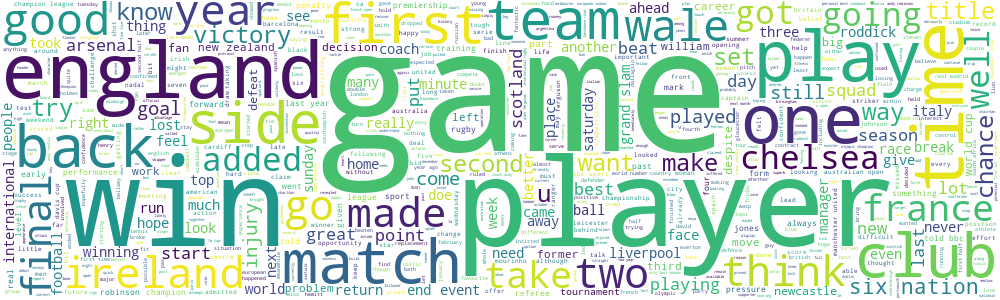

In [253]:
data_i = data.iloc[np.argwhere(kmeans_res == 0).ravel(), -1]
draw_wordcloud(data_i)

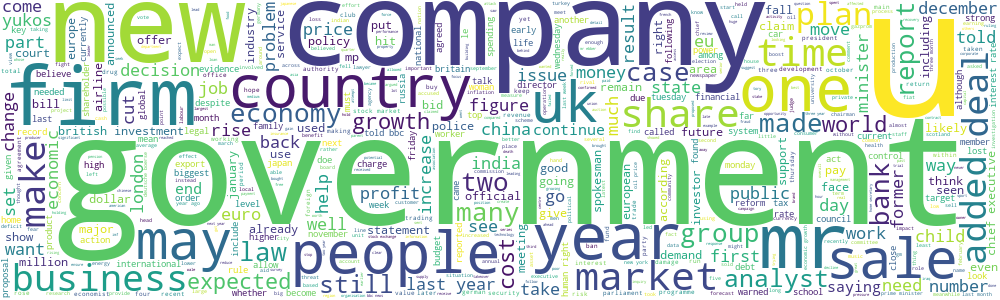

In [254]:
data_i = data.iloc[np.argwhere(kmeans_res == 1).ravel(), -1]
draw_wordcloud(data_i)

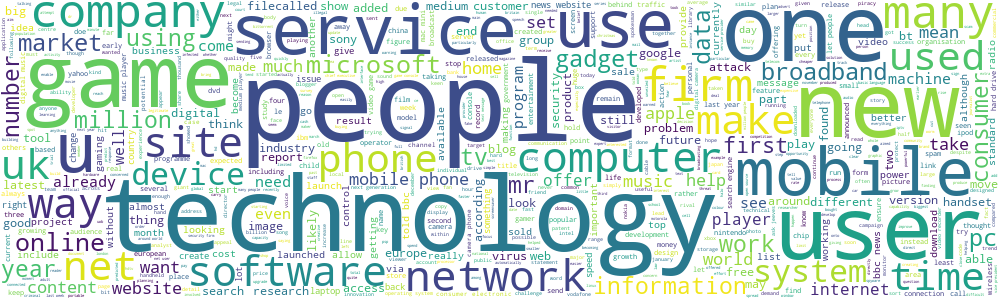

In [255]:
data_i = data.iloc[np.argwhere(kmeans_res == 2).ravel(), -1]
draw_wordcloud(data_i)

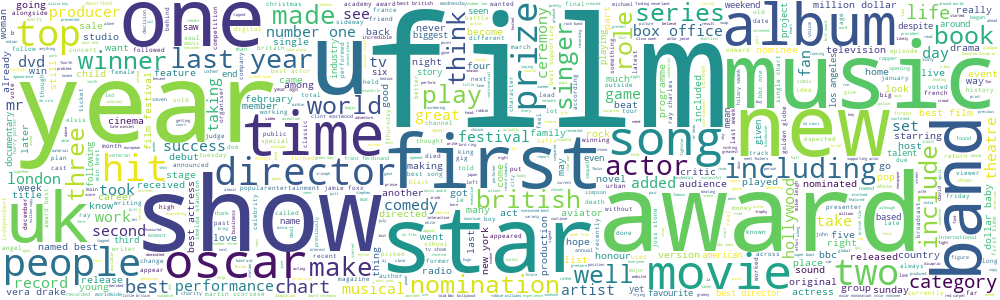

In [256]:
data_i = data.iloc[np.argwhere(kmeans_res == 3).ravel(), -1]
draw_wordcloud(data_i)

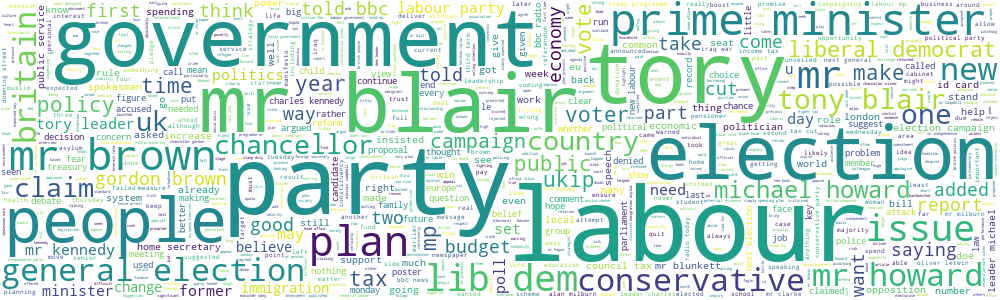

In [257]:
data_i = data.iloc[np.argwhere(kmeans_res == 4).ravel(), -1]
draw_wordcloud(data_i)

In [262]:
n_clusters = 8
spectral_estimator = SpectralClustering(n_clusters=n_clusters, n_components=10000)
spectral_res = spectral_estimator.fit_predict(tf_idf_data)

/home/constantine/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1590: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


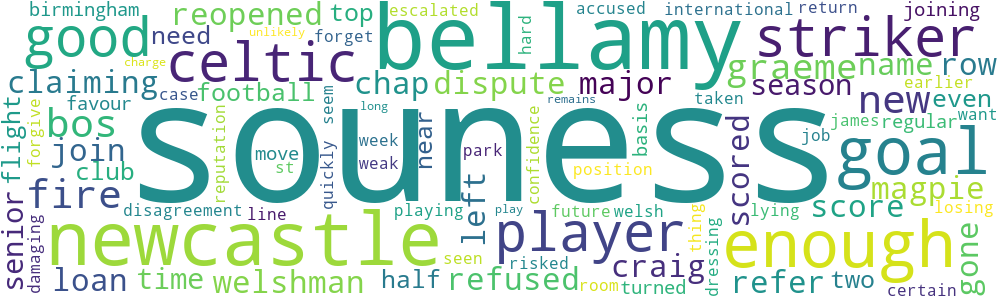

In [263]:
data_i = data.iloc[np.argwhere(spectral_res == 0).ravel(), -1]
draw_wordcloud(data_i)

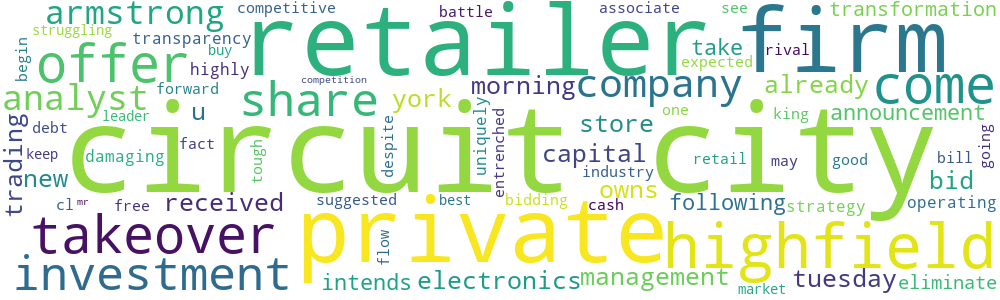

In [264]:
data_i = data.iloc[np.argwhere(spectral_res == 1).ravel(), -1]
draw_wordcloud(data_i)

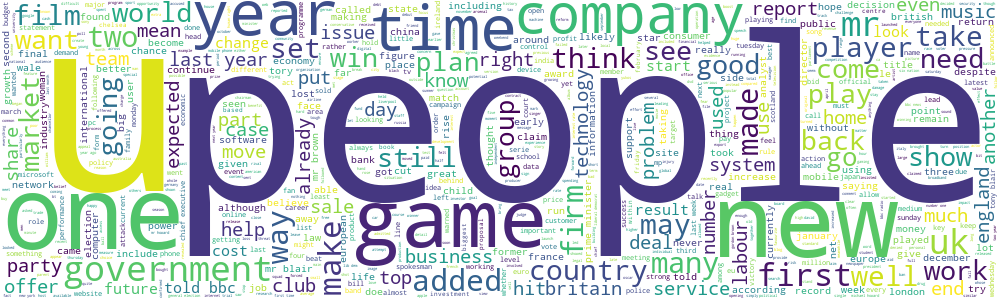

In [265]:
data_i = data.iloc[np.argwhere(spectral_res == 2).ravel(), -1]
draw_wordcloud(data_i)

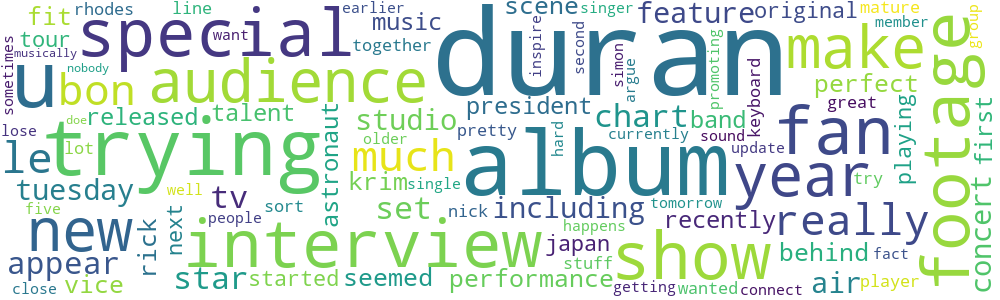

In [266]:
data_i = data.iloc[np.argwhere(spectral_res == 3).ravel(), -1]
draw_wordcloud(data_i)

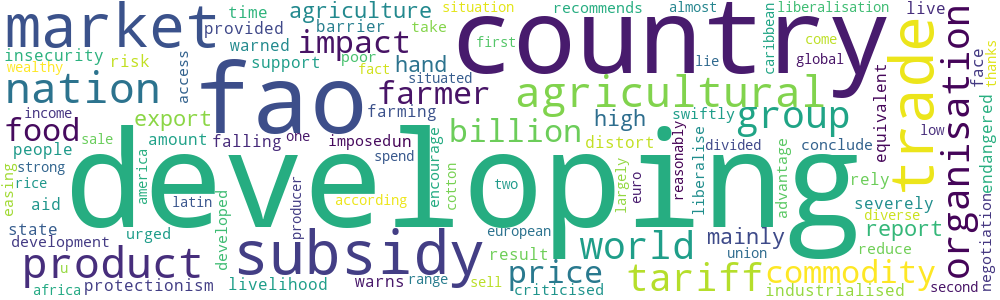

In [267]:
data_i = data.iloc[np.argwhere(spectral_res == 4).ravel(), -1]
draw_wordcloud(data_i)

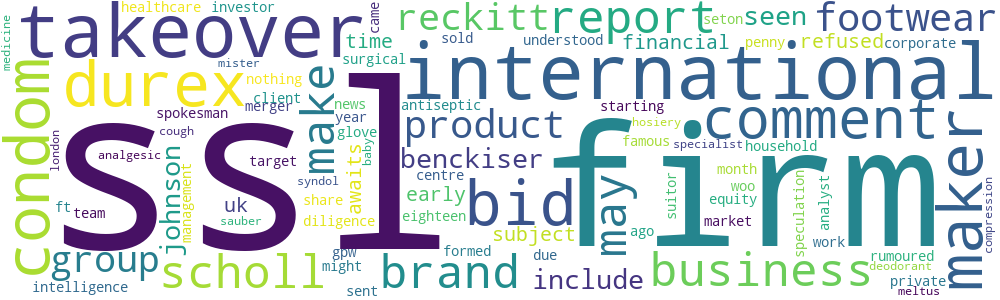

In [268]:
data_i = data.iloc[np.argwhere(spectral_res == 5).ravel(), -1]
draw_wordcloud(data_i)

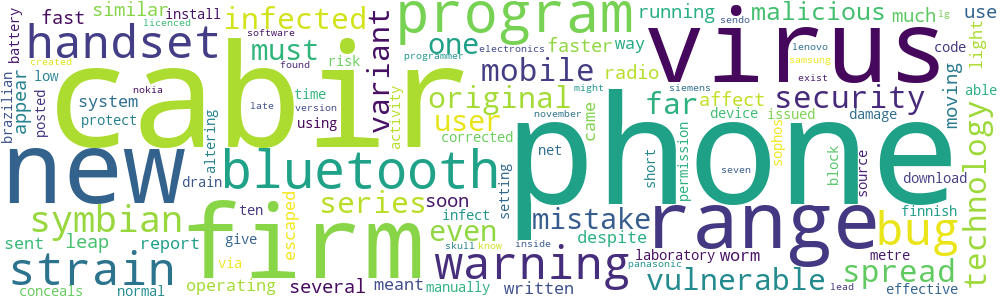

In [269]:
data_i = data.iloc[np.argwhere(spectral_res == 6).ravel(), -1]
draw_wordcloud(data_i)

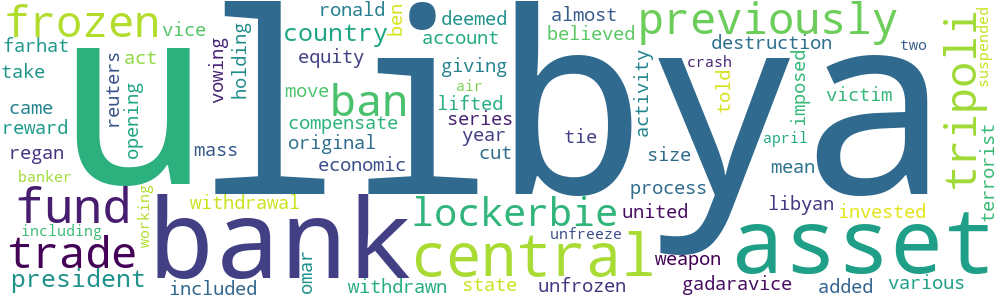

In [272]:
data_i = data.iloc[np.argwhere(spectral_res == 7).ravel(), -1]
draw_wordcloud(data_i)

In [324]:
dbscan_estimator = DBSCAN(eps=0.98)
dbscan_res = dbscan_estimator.fit_predict(tf_idf_data)
dbscan_res.max()

7

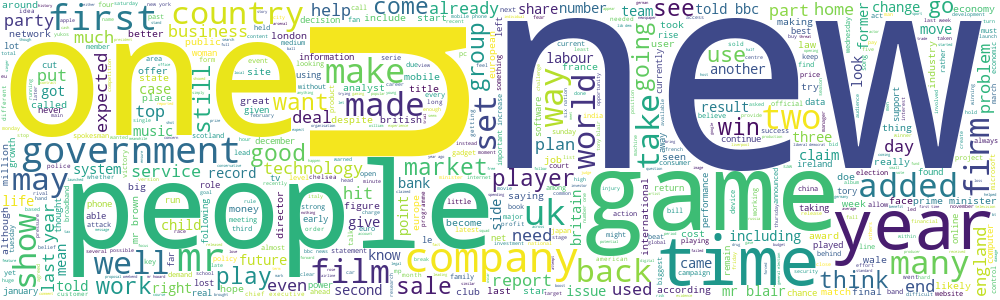

In [330]:
data_i = data.iloc[np.argwhere(dbscan_res == 0).ravel(), -1]
draw_wordcloud(data_i)